The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

In [2]:
import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

In [17]:
anp_df.head()

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
0,951727030670259635_143763900,hot_boys,0.017,0.1760,amazement
1,951727030670259635_143763900,young_couple,0.019,0.2113,joy
2,951727030670259635_143763900,dirty_laundry,-0.263,0.0929,joy
3,951727030670259635_143763900,global_mall,-0.031,0.1304,interest
4,951728575726873168_289794729,high_boots,0.025,0.1394,amazement


In [18]:
face_df.head()

,image_id,face_id,face_gender,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SAD,12.660271
1,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,CALM,8.252973
2,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SURPRISED,24.634266
3,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,HAPPY,53.603287
4,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,SAD,5.509090


In [19]:
image_df.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


In [20]:
metrics_df.head()

,image_id,comment_count,comment_count_time_created,like_count,like_count_time_created
0,1337283311810249709_3041716852,0.0,19-06-2017 19:33:26,15.0,19-06-2017 19:23:26
1,1337283311810249709_3041716852,0.0,19-06-2017 19:23:26,15.0,19-06-2017 19:23:26
2,1337834353379743556_3041716852,0.0,19-06-2017 19:33:26,23.0,19-06-2017 19:23:26
3,1337834353379743556_3041716852,0.0,19-06-2017 19:23:26,23.0,19-06-2017 19:23:26
4,1516356155708878303_3041716852,5.0,19-06-2017 19:23:07,19.0,19-06-2017 19:23:07


In [21]:
object_labels_df.head()

,image_id,data_amz_label,data_amz_label_confidence
0,863479386465416946_545497348,Animal,90.163101
1,916939688871507178_545497348,Animal,83.518669
2,551681403589539797_545497348,Animal,74.837212
3,1189285646274180856_545497348,Animal,76.920967
4,962361211517974133_545497348,Animal,71.223869


In [22]:
survey_df.head()

,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0,public
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0,public
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN,private
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN,private
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0,public


In [3]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')

In [4]:
image_anp_frame.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos,anp_label,anp_sentiment,emotion_score,emotion_label
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement
1,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,sleepy_dog,-0.304,0.1556,sadness
2,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,sweet_face,0.389,0.1813,joy
3,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,old_dog,0.043,0.1336,amazement
4,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,good_boy,0.967,0.1209,joy


In [7]:
im_anp_obj_frame.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,user_bio,user_followed_by,user_follows,user_posted_photos,anp_label,anp_sentiment,emotion_score,emotion_label,data_amz_label,data_amz_label_confidence
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement,Animal,82.891838
1,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement,Canine,82.891838
2,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement,Dog,82.891838
3,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement,Husky,82.891838
4,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement,Mammal,82.891838


In [8]:
im_anp_obj_face_frame.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [9]:
im_anp_obj_face_frame.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [10]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,-0.034337,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,0.026916,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,-0.315009,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_followed_by,-0.044179,0.032737,-0.010293,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,-0.014647,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,0.022166,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,0.024249,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,-0.059100,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,-0.020458,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,-0.025877,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657
face_id,-0.034337,0.026916,-0.315009,-0.014647,0.022166,0.024249,-0.059100,-0.020458,-0.025877,1.000000,...,0.036708,0.013296,-0.003710,0.005873,-0.005058,-0.023133,-0.011505,0.009042,-0.027795,0.005240


** To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated. **

** To-Do 4: Calculate the Spearman rank for the attributes. **

### ASSIGNMENT

In this notebook we learned how to train and test a regressor on numerical data. For this assignment you are required to do the following:

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.

In [27]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

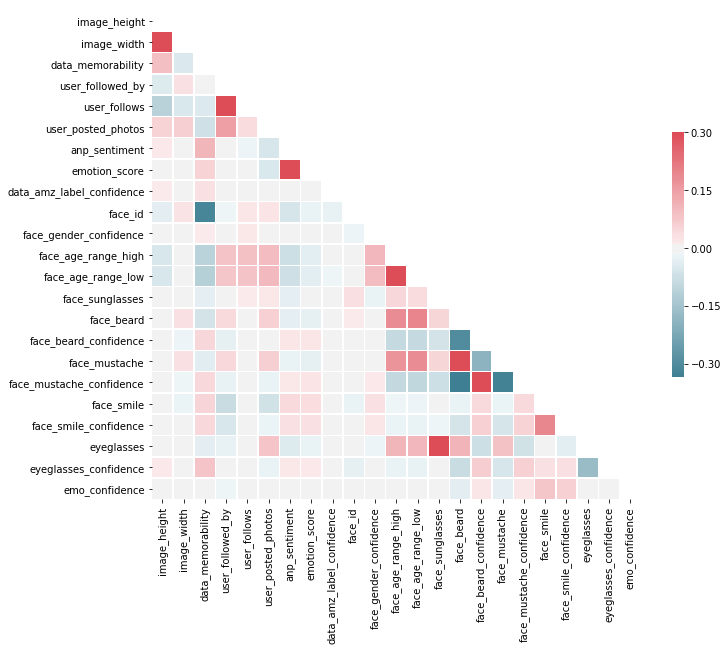

In [29]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
image_anp_frame.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,...,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos,anp_label,anp_sentiment,emotion_score,emotion_label
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,cute_puppy,0.285,0.2036,amazement
1,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,sleepy_dog,-0.304,0.1556,sadness
2,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,sweet_face,0.389,0.1813,joy
3,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,old_dog,0.043,0.1336,amazement
4,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,...,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0,good_boy,0.967,0.1209,joy


In [16]:
list(image_anp_frame)-[u'image_id',u'image_link',u'image_url',]

[u'image_id',
 u'image_link',
 u'image_url',
 u'image_height',
 u'image_width',
 u'image_filter',
 u'image_posted_time_unix',
 u'image_posted_time',
 u'data_memorability',
 u'user_id',
 u'user_full_name',
 u'user_name',
 u'user_website',
 u'user_profile_pic',
 u'user_bio',
 u'user_followed_by',
 u'user_follows',
 u'user_posted_photos',
 u'anp_label',
 u'anp_sentiment',
 u'emotion_score',
 u'emotion_label']